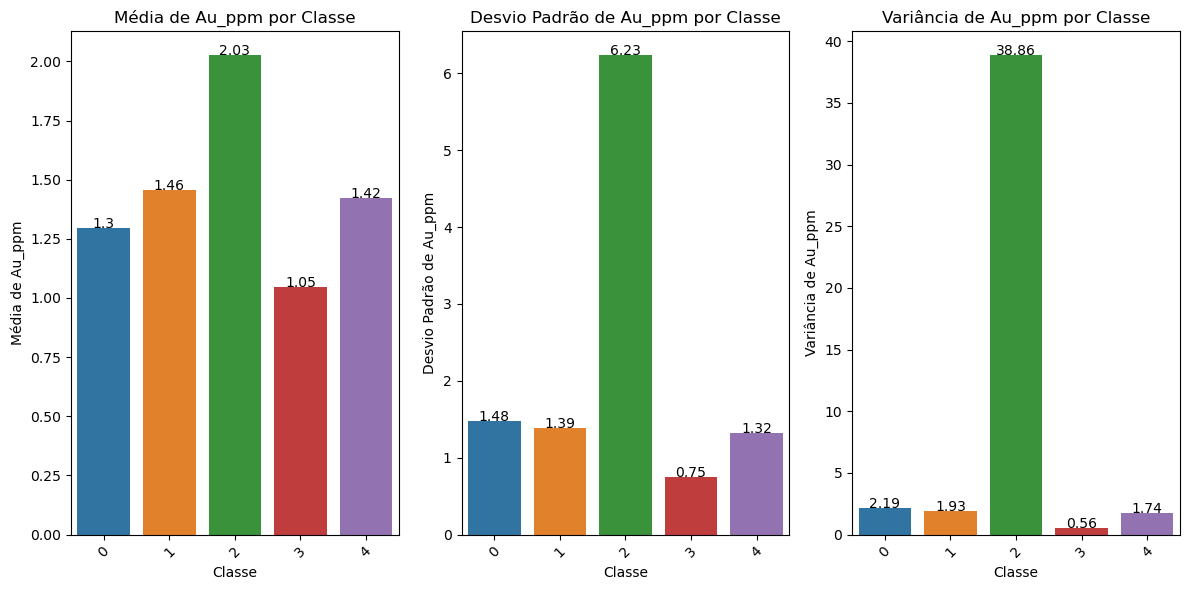

Gráficos de média, desvio padrão e variância gerados com sucesso!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carregar o dataset
file_path = r"D:\python\hochschild\COMPOSITE_2_5_NORMALIZADO_with_clusters_Iso.csv"
data = pd.read_csv(file_path)

# Filtrar os dados para usar apenas valores de Au_ppm maiores que 0.32
data = data[data['Au_ppm'] > 0.32]

# Remover as colunas especificadas, se existirem
columns_to_remove = ['N_Muestra', 'KMeans_Labels', 'GMM_Labels', 
                     'Hierarchical_Labels', 'mid_x', 'mid_y', 
                     'mid_z', 'from', 'to']
columns_to_remove = [col for col in columns_to_remove if col in data.columns]
data = data.drop(columns=columns_to_remove)


# Variável categórica
categorical_var = 'Double_Space_Labels'

# Calcular a média, desvio padrão e variância por classe
stats = data.groupby(categorical_var)['Au_ppm'].agg(['mean', 'std', 'var']).reset_index()

# Plotar as estatísticas
plt.figure(figsize=(12, 6))

# Gráfico de barras para a média
plt.subplot(1, 3, 1)
sns.barplot(x=categorical_var, y='mean', data=stats)
plt.title('Média de Au_ppm por Classe')
plt.xlabel('Classe')
plt.ylabel('Média de Au_ppm')
plt.xticks(rotation=45)
for index, row in stats.iterrows():
    plt.text(index, row['mean'], round(row['mean'], 2), color='black', ha="center")

# Gráfico de barras para o desvio padrão
plt.subplot(1, 3, 2)
sns.barplot(x=categorical_var, y='std', data=stats)
plt.title('Desvio Padrão de Au_ppm por Classe')
plt.xlabel('Classe')
plt.ylabel('Desvio Padrão de Au_ppm')
plt.xticks(rotation=45)
for index, row in stats.iterrows():
    plt.text(index, row['std'], round(row['std'], 2), color='black', ha="center")

# Gráfico de barras para a variância
plt.subplot(1, 3, 3)
sns.barplot(x=categorical_var, y='var', data=stats)
plt.title('Variância de Au_ppm por Classe')
plt.xlabel('Classe')
plt.ylabel('Variância de Au_ppm')
plt.xticks(rotation=45)
for index, row in stats.iterrows():
    plt.text(index, row['var'], round(row['var'], 2), color='black', ha="center")

plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(file_path), 'estatisticas_Au_ppm_por_classe.png'))
plt.show()

print("Gráficos de média, desvio padrão e variância gerados com sucesso!")


